In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.colors as mcolors
import matplotlib as mpl
from scipy.optimize import curve_fit as cf
from math import floor
from scipy import *
import re

In [5]:
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.markersize'] = 4
#mpl.rcParams['figure.autolayout'] = True
mpl.rcParams['font.size'] = 15
mpl.rcParams['errorbar.capsize'] = 3
mpl.rcParams['lines.markeredgewidth'] = 1
mpl.rcParams['axes.axisbelow'] = True

In [6]:
import os
os.environ['PINT_ARRAY_PROTOCOL_FALLBACK'] = "0"
import pint
ureg = pint.UnitRegistry()
Q_ = ureg.Quantity
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    Q_([])

In [7]:
dcmls = lambda x : -int(floor(np.log10(abs(x))))

lineal0 = lambda x,a : a*x
lineal = lambda x,a,b : a*x+b

ureg = pint.UnitRegistry()

In [8]:
R = 833.33 * ureg.ohm
C = 1 * ureg.microfarad
w0 = 1/(R*C).to_base_units()
w0
f0 = w0/(2*np.pi)
f0

190.98669565705703 <Unit('1 / second')>

In [9]:
with open('RC.txt', 'r', encoding='ISO-8859-1') as file:
    content = file.read()
rows = content.strip().split('\n')

freq = []
db = []
phase = []

for row in rows[1:]: 
    match = re.match(r'([\d.e+-]+)\t\(([-\d.e+-]+)dB,([-\d.e+-]+)°\)', row)
    if match:
        freq.append(float(match.group(1)))
        db.append(float(match.group(2)))
        phase.append(float(match.group(3)))

df_RC = pd.DataFrame({'freq':freq,'A':db,'phi': phase})

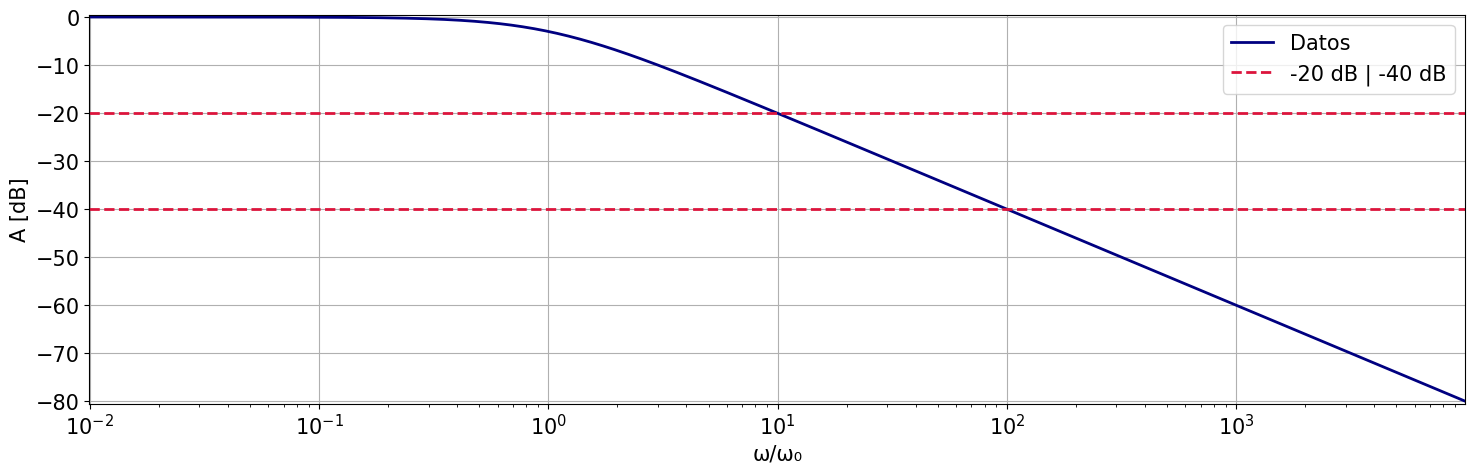

In [10]:
plt.figure(figsize=(15,5))
plt.plot(df_RC.freq*2*np.pi/w0.magnitude,df_RC.A,'navy',zorder=1,label='Datos')
plt.xscale('log')
plt.xlim(min(df_RC.freq*2*np.pi/w0.magnitude),max(df_RC.freq*2*np.pi/w0.magnitude))
plt.ylim(min(df_RC.A)-0.5,max(df_RC.A)+0.5)
plt.grid()
plt.xlabel('\u03C9/\u03C9\u2080')
plt.ylabel('A [dB]')
plt.axhline(-20,c='crimson',ls='--',zorder=2,label='-20 dB | -40 dB')
plt.axhline(-40,c='crimson',ls='--',zorder=2)
plt.tight_layout()
plt.legend()
plt.savefig('RC.png')

In [11]:
R = 1200 * ureg.ohm
L = 1 * ureg.henry
w0 = (R/L).to(ureg.hertz)
w0
f0 = w0/(2*np.pi)
f0

190.9859317102744 <Unit('hertz')>

In [12]:
with open('RL.txt', 'r', encoding='ISO-8859-1') as file:
    content = file.read()
rows = content.strip().split('\n')

freq = []
db = []
phase = []

for row in rows[1:]: 
    match = re.match(r'([\d.e+-]+)\t\(([-\d.e+-]+)dB,([-\d.e+-]+)°\)', row)
    if match:
        freq.append(float(match.group(1)))
        db.append(float(match.group(2)))
        phase.append(float(match.group(3)))

df_RL = pd.DataFrame({'freq':freq,'A':db,'phi': phase})

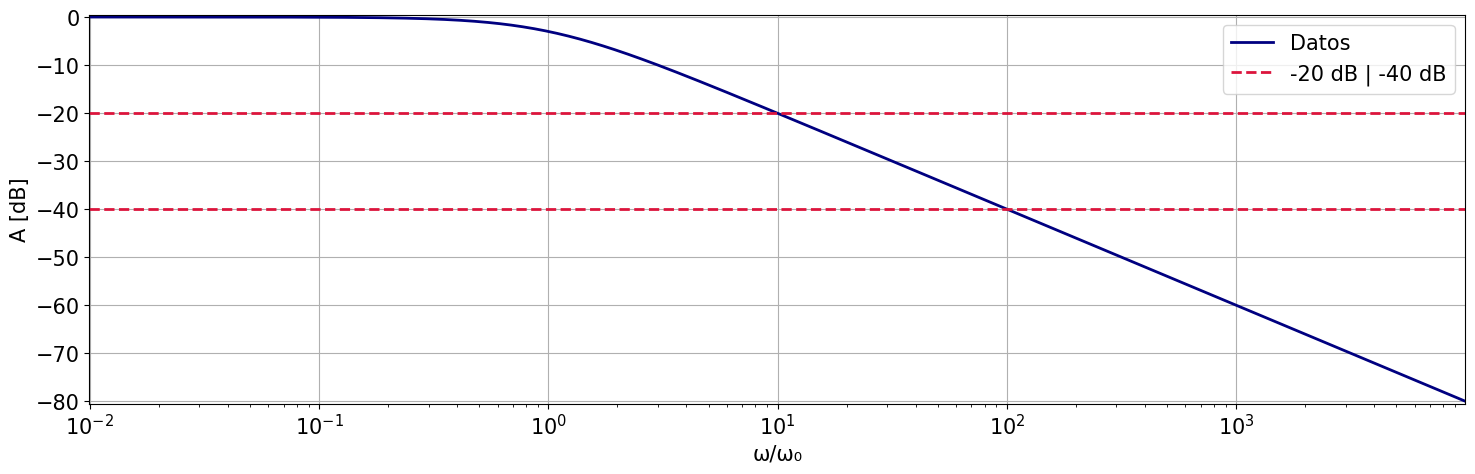

In [13]:
plt.figure(figsize=(15,5))
plt.plot(df_RL.freq*2*np.pi/w0.magnitude,df_RL.A,'navy',zorder=1,label='Datos')
plt.xscale('log')
plt.xlim(min(df_RL.freq*2*np.pi/w0.magnitude),max(df_RL.freq*2*np.pi/w0.magnitude))
plt.ylim(min(df_RL.A)-0.5,max(df_RL.A)+0.5)
plt.grid()
plt.xlabel('\u03C9/\u03C9\u2080')
plt.ylabel('A [dB]')
plt.axhline(-20,c='crimson',ls='--',zorder=2,label='-20 dB | -40 dB')
plt.axhline(-40,c='crimson',ls='--',zorder=2)
plt.tight_layout()
plt.legend()
plt.savefig('RL.png')

In [14]:
C = 1 * ureg.microfarad
L = 1/1.44 * ureg.henry
w0 = (1/np.sqrt(L*C)).to(ureg.hertz)
w0
f0 = w0/(2*np.pi)
f0
L

0.6944444444444444 <Unit('henry')>

In [15]:
with open('RLC.txt', 'r', encoding='ISO-8859-1') as file:
    content = file.read()
rows = content.strip().split('\n')

freq = []
db = []
phase = []

for row in rows[1:]: 
    match = re.match(r'([\d.e+-]+)\t\(([-\d.e+-]+)dB,([-\d.e+-]+)°\)', row)
    if match:
        freq.append(float(match.group(1)))
        db.append(float(match.group(2)))
        phase.append(float(match.group(3)))

df_RLC = pd.DataFrame({'freq':freq,'A':db,'phi': phase})

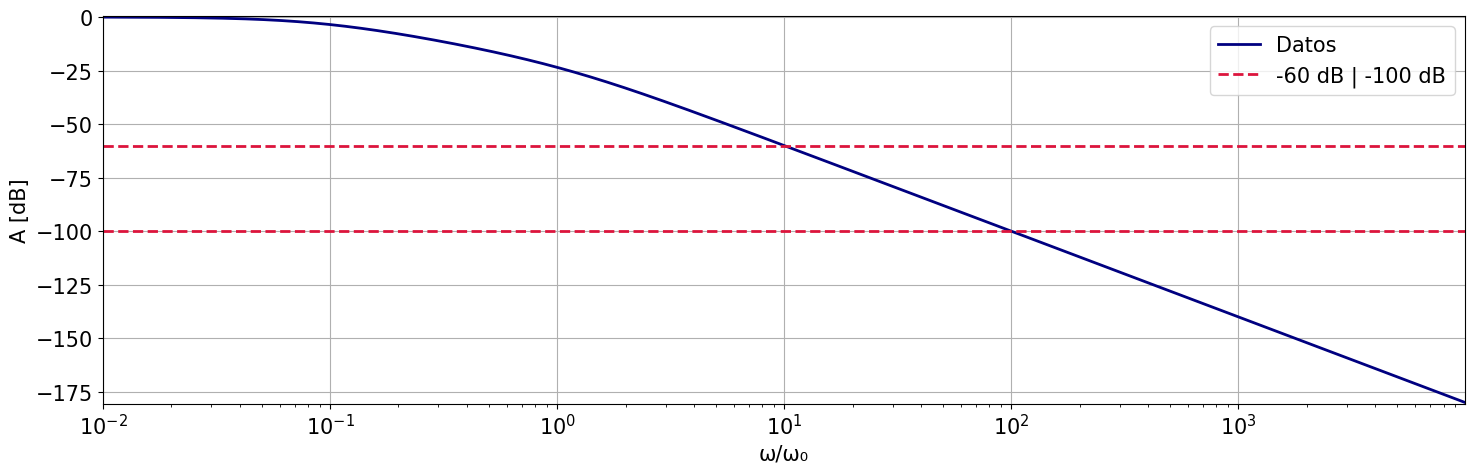

In [16]:
plt.figure(figsize=(15,5))
plt.plot(df_RLC.freq*2*np.pi/w0.magnitude,df_RLC.A,'navy',zorder=1,label='Datos')
plt.xscale('log')
plt.xlim(min(df_RLC.freq*2*np.pi/w0.magnitude),max(df_RLC.freq*2*np.pi/w0.magnitude))
plt.ylim(min(df_RLC.A)-0.5,max(df_RLC.A)+0.5)
plt.grid()
plt.xlabel('\u03C9/\u03C9\u2080')
plt.ylabel('A [dB]')
plt.axhline(-60,c='crimson',ls='--',zorder=2,label='-60 dB | -100 dB')
plt.axhline(-100,c='crimson',ls='--',zorder=2)
plt.tight_layout()
plt.legend()
plt.savefig('RLC.png')